In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from fitter import Fitter, get_common_distributions, get_distributions

In [2]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [3]:
url = "/bigdata/jelicicna/output_datasets/anlysis_data_nextbike_2020-01.csv"
df = pd.read_csv(url, sep=';', low_memory=False)

# Distances Analysis

### Inital view of the data

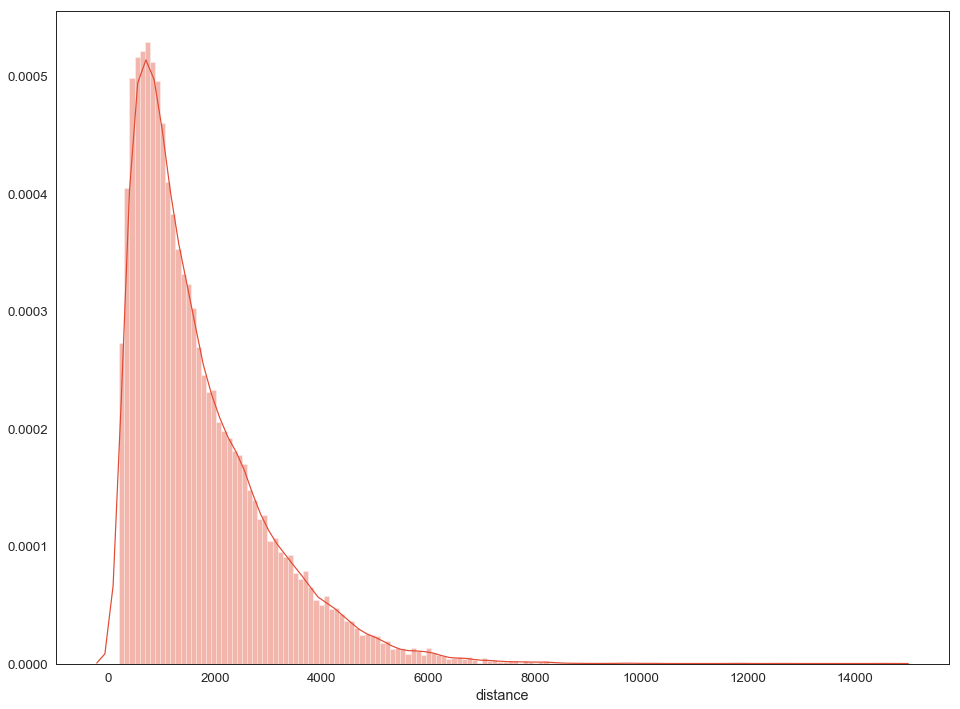

In [4]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df['distance'], bins = 150)

In [5]:
distance = df["distance"].values

#### 5 common distributions

,aic,bic,kl_div,sumsquare_error
gamma,3893.283389,-1.547524e+06,inf,1.487241e-08
beta,4015.880880,-1.534579e+06,inf,1.893753e-08
burr,3387.412161,-1.439685e+06,inf,1.114941e-07
norm,7270.265894,-1.340642e+06,inf,7.096136e-07
lognorm,3627.959993,-1.262491e+06,inf,3.054983e-06


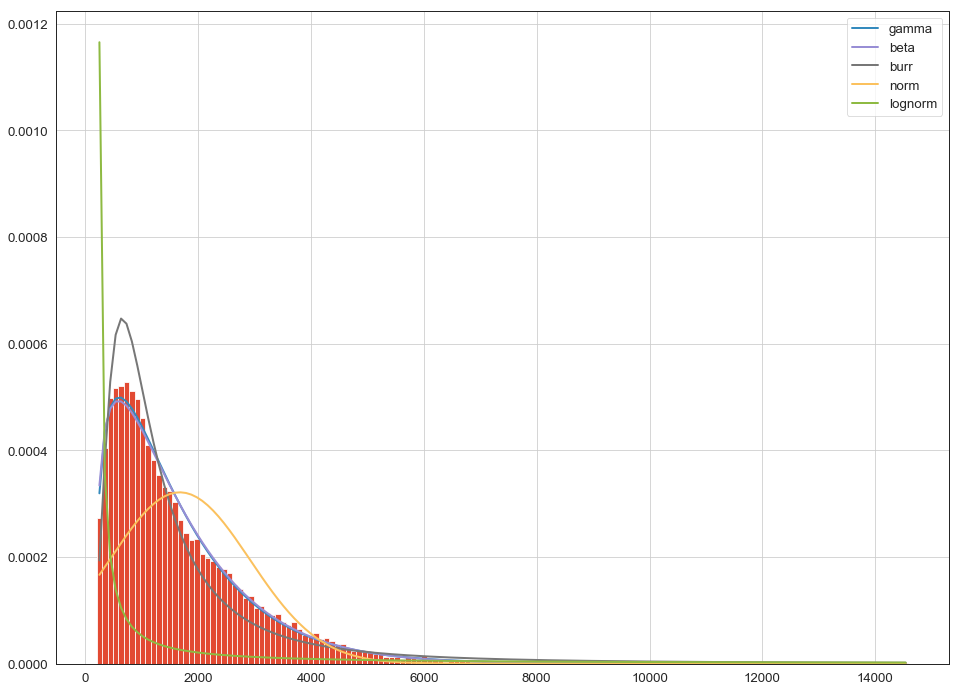

In [6]:
f = Fitter(distance,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins=150)
f.fit()
f.summary()

In [7]:
f.get_best(method = 'sumsquare_error')

{'gamma': (1.3702305887420914, 198.42270743394153, 1076.4052120893343)}

In [8]:
f.get_best(method = 'aic')

{'burr': (1.6335120856759504,
  3.1074739096850896,
  -3.5363053987181274,
  500.4362157730808)}

In [9]:
f.get_best(method = 'bic')

{'gamma': (1.3702305887420914, 198.42270743394153, 1076.4052120893343)}

### Fitting distributions with regards to the result of 5 from above including variety of common distributions

,aic,bic,kl_div,sumsquare_error
beta,4015.880880,-1.534579e+06,inf,1.893753e-08
burr,3387.412161,-1.439685e+06,inf,1.114941e-07
alpha,3302.967500,-1.380469e+06,inf,3.371280e-07
norm,7270.265894,-1.340642e+06,inf,7.096136e-07
bradford,3022.221515,-1.327736e+06,inf,9.029142e-07


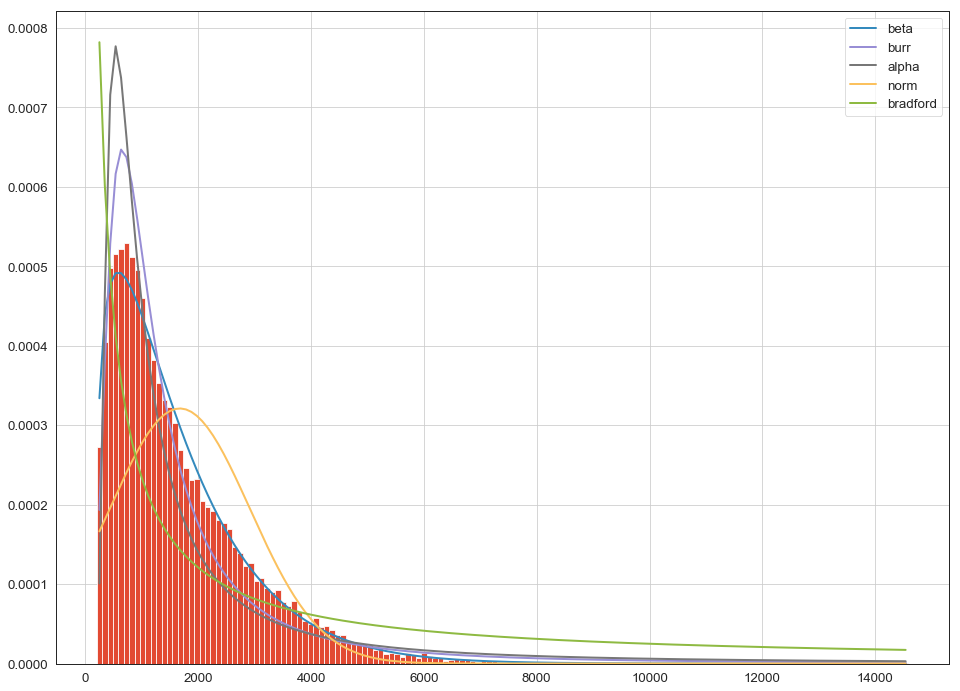

In [10]:
f = Fitter(distance,
           distributions= ['alpha','beta','norm','bradford','burr'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
chi,5021.026392,-1.427954e+06,inf,1.388413e-07
expon,3657.314572,-1.399831e+06,inf,2.348488e-07
dgamma,4543.971733,-1.358139e+06,inf,5.116410e-07
cosine,3125.877337,-1.278535e+06,inf,2.264261e-06
chi2,567072.505434,-1.257040e+06,3.644429,3.382491e-06


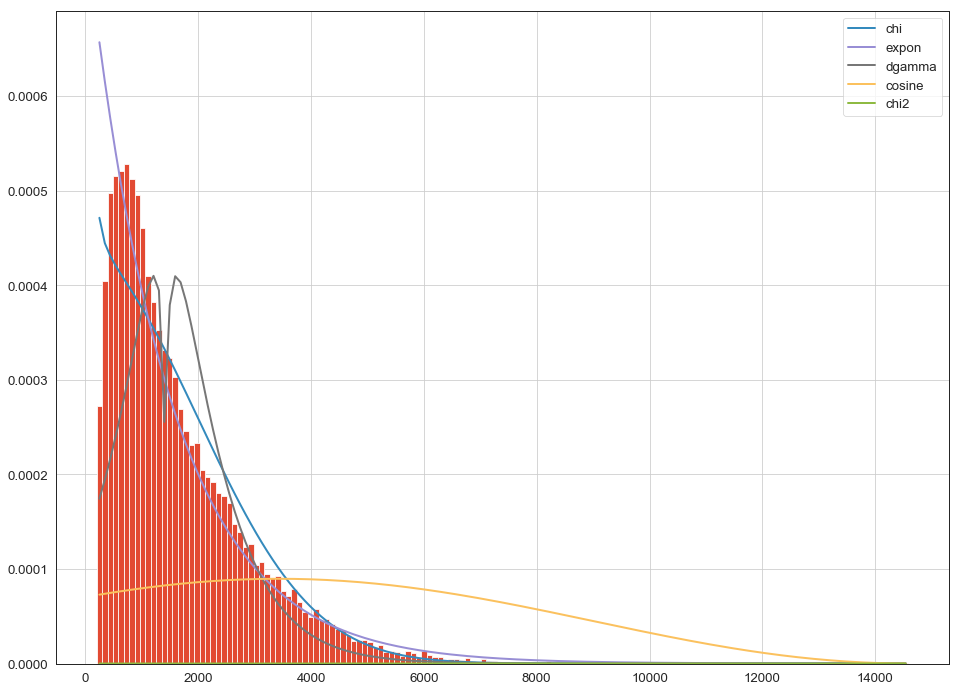

In [11]:
f = Fitter(distance,
           distributions= ['chi','chi2','cosine','dgamma','expon'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
gamma,3893.283389,-1.547524e+06,inf,1.487241e-08
fatiguelife,3715.476055,-1.526359e+06,inf,2.208521e-08
exponnorm,3732.893808,-1.493199e+06,inf,4.103423e-08
f,3651.996493,-1.473489e+06,inf,5.928952e-08
fisk,3435.242555,-1.461090e+06,inf,7.475908e-08


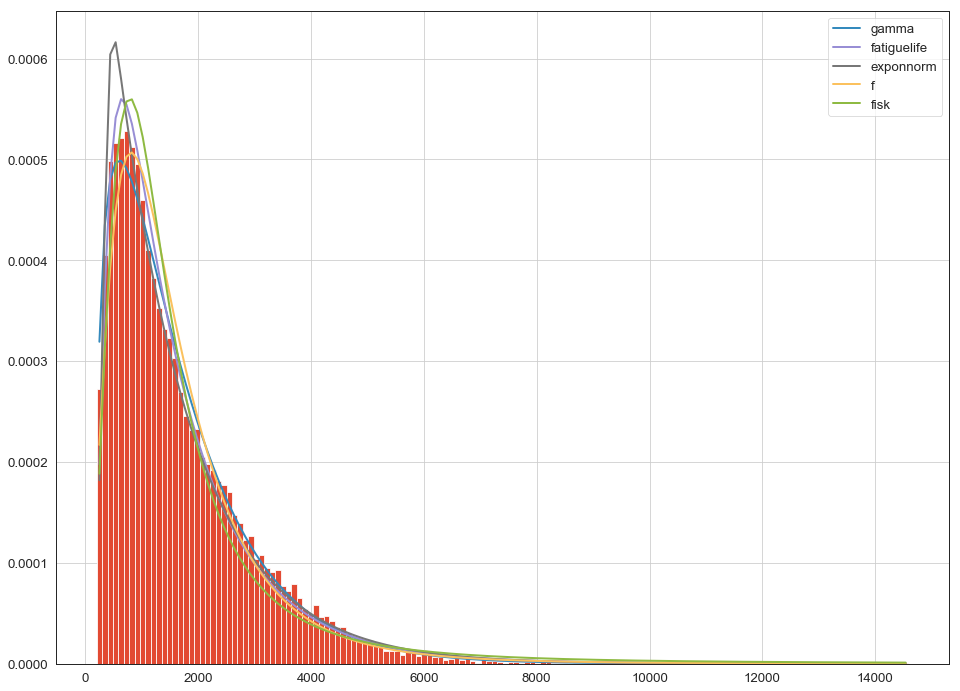

In [12]:
f = Fitter(distance,
           distributions= ['exponnorm','f','fatiguelife','fisk','gamma'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
gengamma,3660.786994,-1.399662e+06,inf,2.354939e-07
genexpon,3700.368069,-1.394643e+06,inf,2.585920e-07
levy,3214.898112,-1.354853e+06,inf,5.441456e-07
loggamma,7333.029346,-1.338436e+06,inf,7.393145e-07
lognorm,3627.959993,-1.262491e+06,inf,3.054983e-06


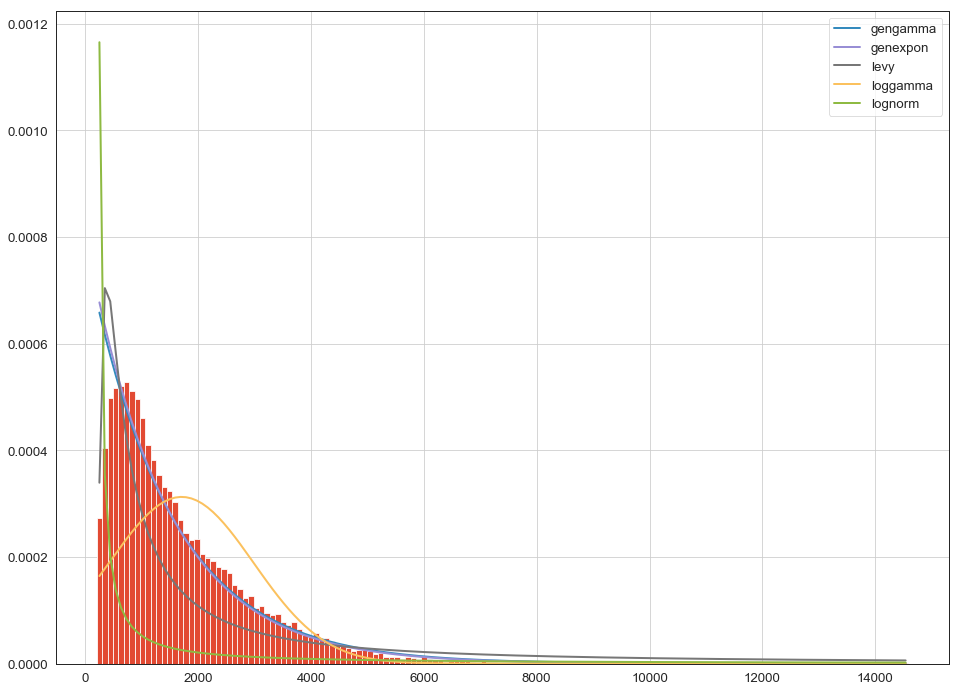

In [13]:
f = Fitter(distance,
           distributions= ['genexpon','gengamma','levy','loggamma','lognorm'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
pearson3,3893.283378,-1.547524e+06,inf,1.487241e-08
t,3966.750852,-1.356820e+06,inf,5.244063e-07
logistic,4726.587161,-1.351977e+06,inf,5.741793e-07
powerlaw,2990.604054,-1.297125e+06,inf,1.599592e-06
pareto,3326.706741,-1.246522e+06,inf,4.116988e-06


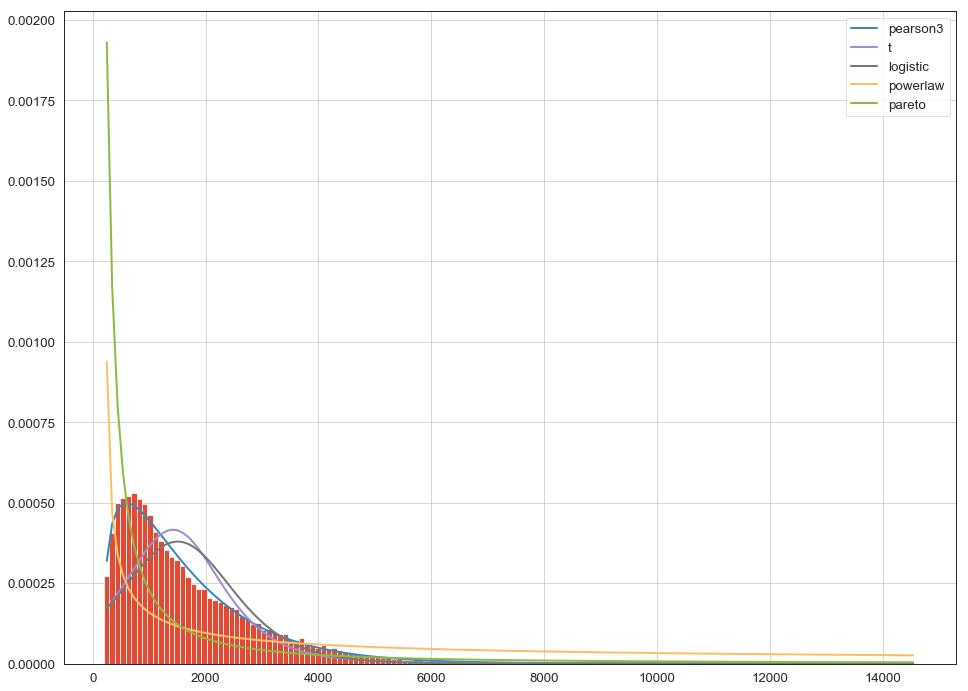

In [14]:
f = Fitter(distance,
           distributions= ['logistic','pareto','pearson3','powerlaw','t'], bins=150)
f.fit()
f.summary()

### 5 best distributions chosen from the above analysis

,aic,bic,kl_div,sumsquare_error
gamma,3893.283389,-1.547524e+06,inf,1.487241e-08
pearson3,3893.283378,-1.547524e+06,inf,1.487241e-08
beta,4015.880880,-1.534579e+06,inf,1.893753e-08
chi,5021.026392,-1.427954e+06,inf,1.388413e-07
genexpon,3700.368069,-1.394643e+06,inf,2.585920e-07


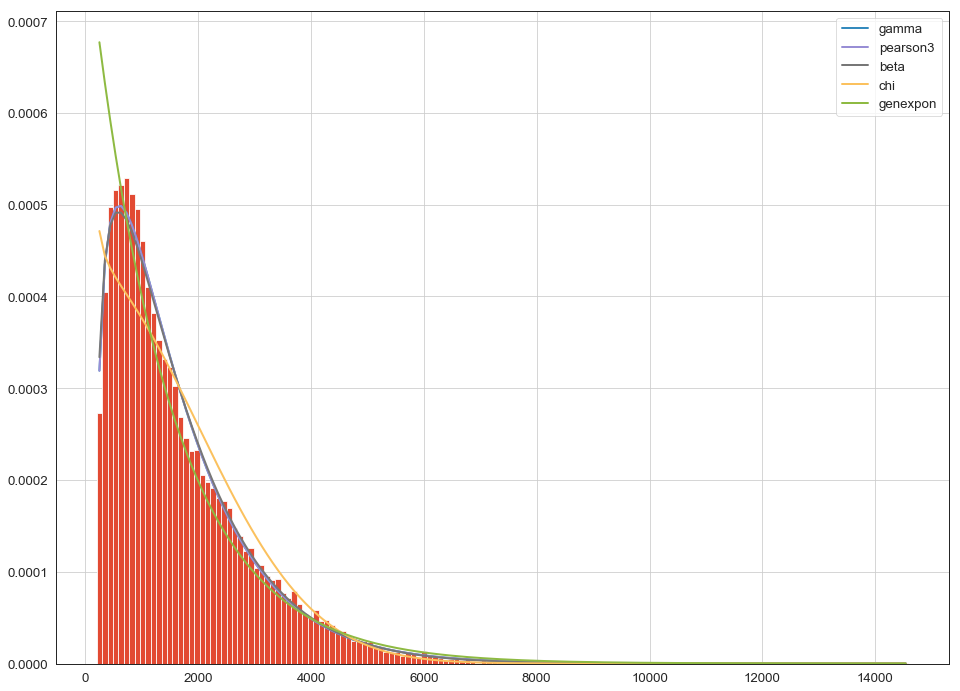

In [31]:
f = Fitter(distance,
           distributions= ['beta','chi','gamma', 'genexpon', 'pearson3'], bins=150)

f.fit()
f.summary()

## Rides Analysis

### Inital view of the data

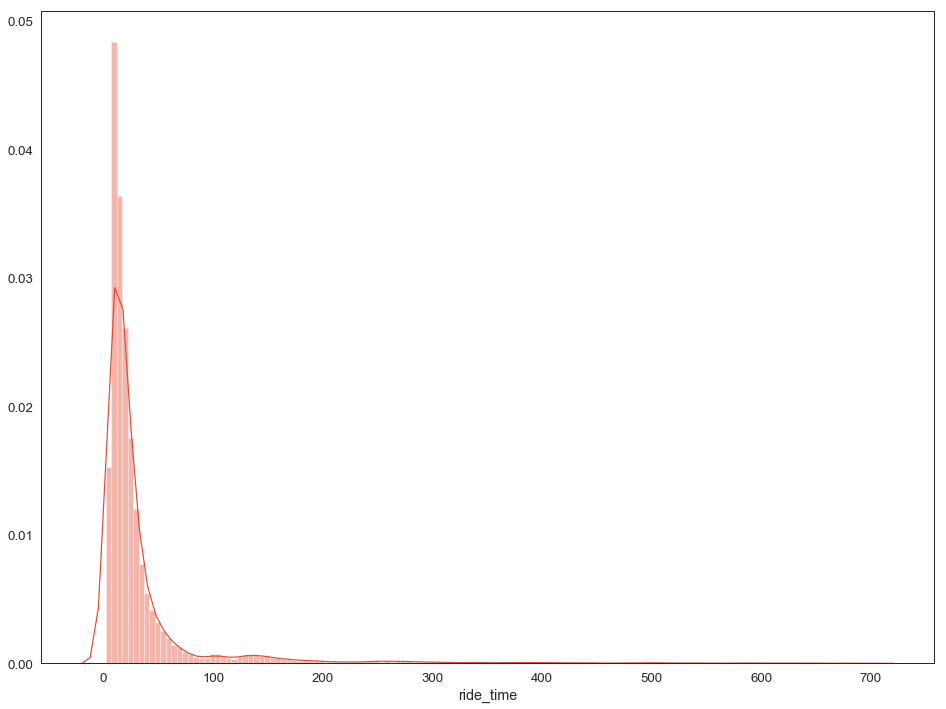

In [16]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df['ride_time'], bins = 140)

In [18]:
rides = df["ride_time"].values

#### 5 common distributions

,aic,bic,kl_div,sumsquare_error
burr,2703.559368,-1.153841e+06,inf,0.000023
lognorm,2957.072917,-1.004457e+06,inf,0.000379
beta,4519.124806,-9.515245e+05,inf,0.001019
gamma,3702.281018,-9.368712e+05,inf,0.001340
norm,6205.762176,-8.839552e+05,inf,0.003601


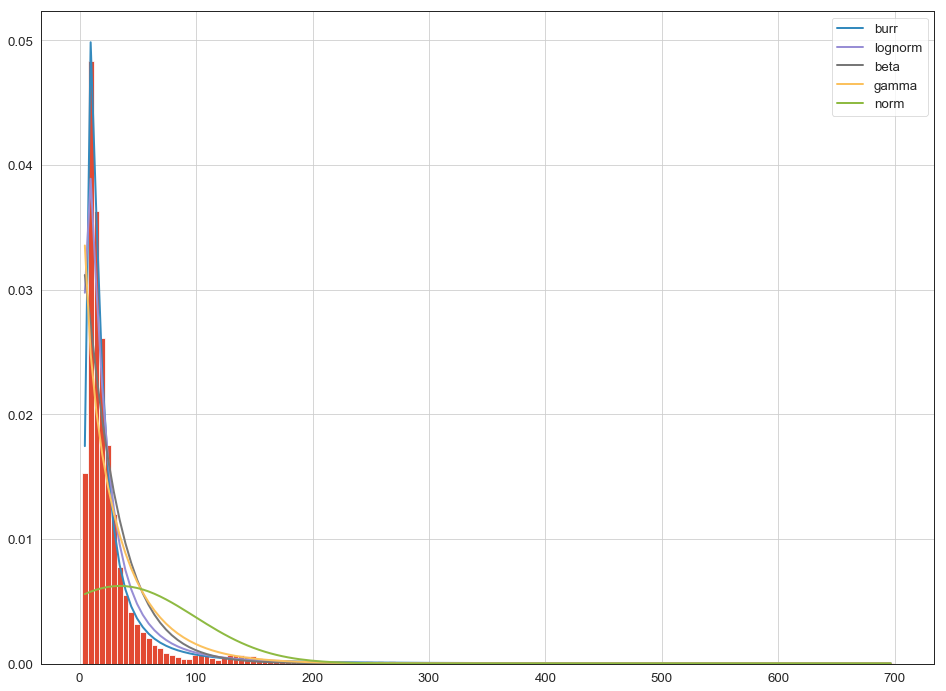

In [23]:
f = Fitter(rides,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins = 140)
f.fit()
f.summary()

In [20]:
f.get_best(method = 'sumsquare_error')

{'burr': (1.439791158838962,
  57.111262371354684,
  -0.004110541339842441,
  0.7705988815008209)}

In [21]:
f.get_best(method = 'aic')

{'burr': (1.439791158838962,
  57.111262371354684,
  -0.004110541339842441,
  0.7705988815008209)}

In [22]:
f.get_best(method = 'bic')

{'burr': (1.439791158838962,
  57.111262371354684,
  -0.004110541339842441,
  0.7705988815008209)}

### Fitting distributions with regards to the result of 5 from above including variety of common distributions

,aic,bic,kl_div,sumsquare_error
burr,2703.559368,-1.153841e+06,inf,0.000023
alpha,2621.311579,-1.132406e+06,inf,0.000035
beta,4519.124806,-9.515245e+05,inf,0.001019
norm,6205.762176,-8.839552e+05,inf,0.003601
bradford,1925.743223,-8.797415e+05,inf,0.003895


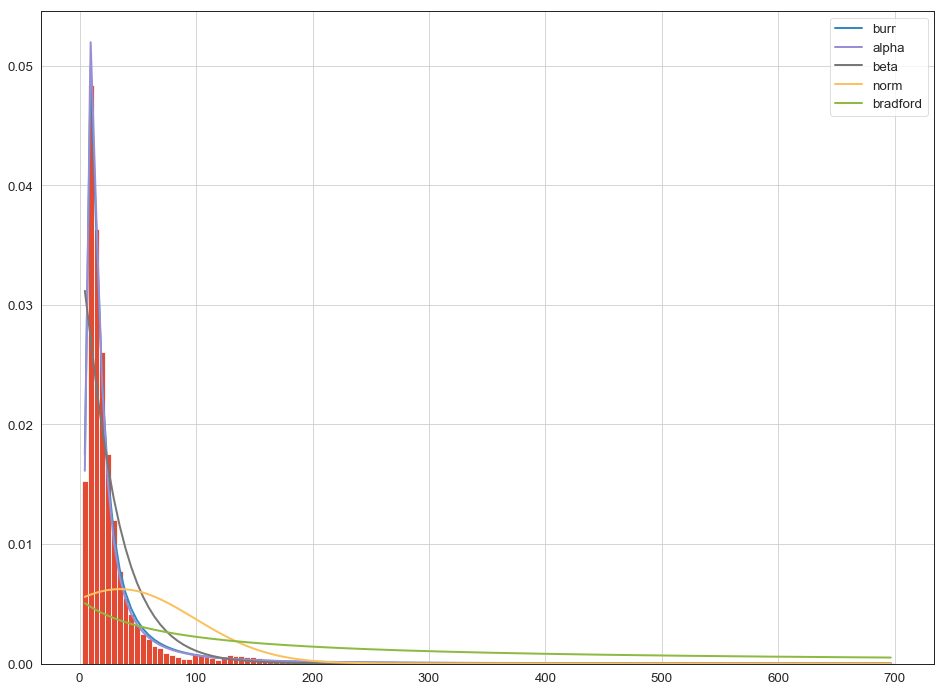

In [24]:
f = Fitter(rides,
           distributions= ['alpha','beta','norm','bradford','burr'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
expon,3974.018199,-943515.433905,inf,0.001183
dgamma,3299.182504,-930023.103766,inf,0.001522
chi2,2453.667552,-913021.027082,inf,0.002091
chi,3652.774652,-909886.563195,inf,0.002218
cosine,2101.489416,-869415.952151,inf,0.004724


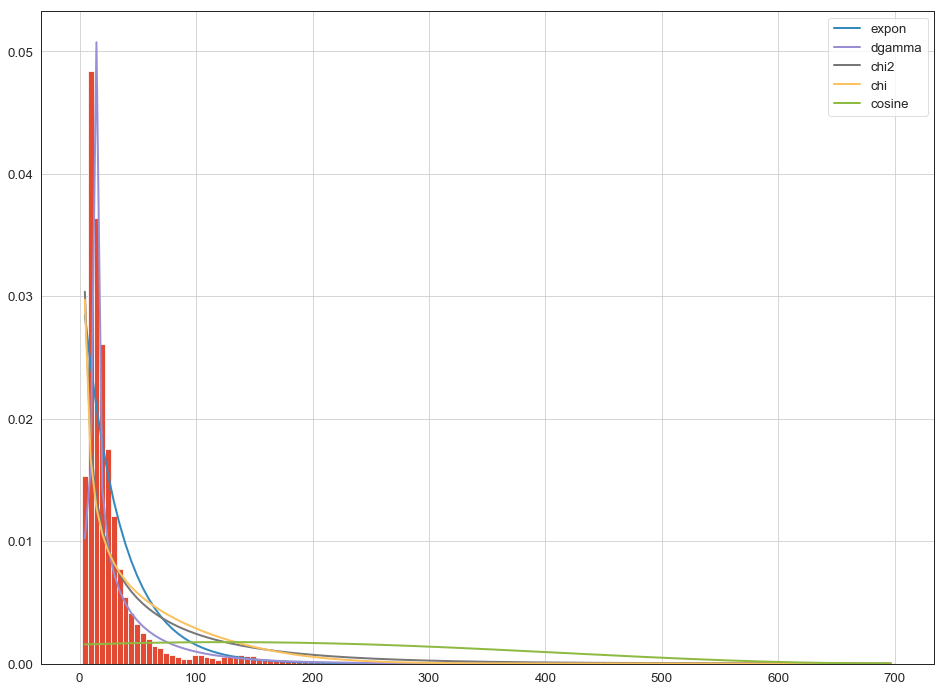

In [25]:
f = Fitter(rides,
           distributions= ['chi','chi2','cosine','dgamma','expon'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
f,2692.889702,-1.127247e+06,inf,0.000038
fisk,2842.507507,-1.038976e+06,inf,0.000199
fatiguelife,3188.265877,-9.759587e+05,inf,0.000645
exponnorm,4172.116291,-9.667723e+05,inf,0.000766
gamma,3702.281018,-9.368712e+05,inf,0.001340


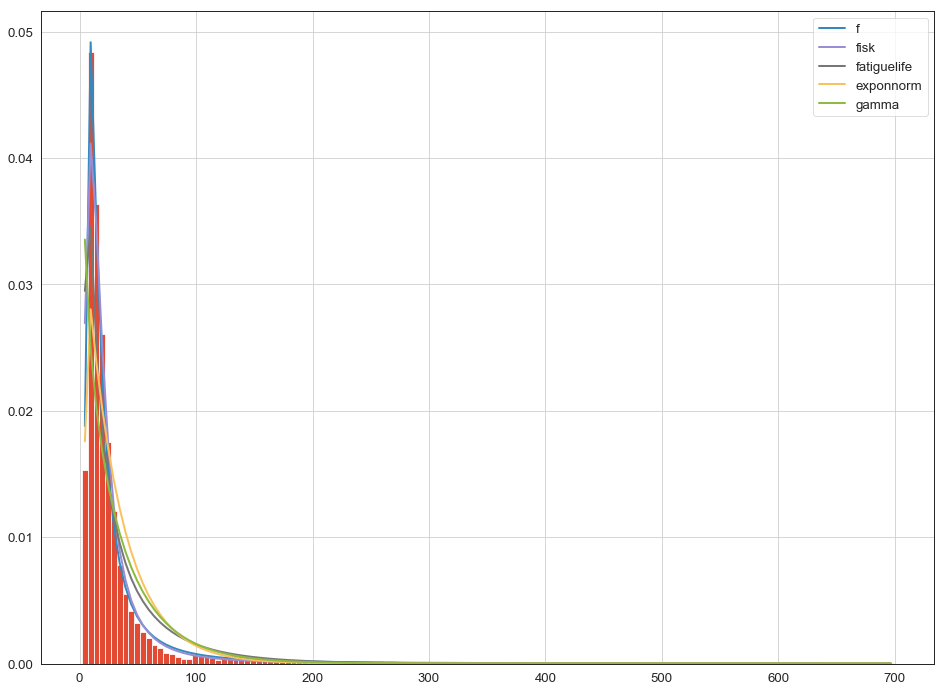

In [26]:
f = Fitter(rides,
           distributions= ['exponnorm','f','fatiguelife','fisk','gamma'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
lognorm,2957.072917,-1.004457e+06,inf,0.000379
genexpon,3979.935246,-9.434814e+05,inf,0.001183
gengamma,3621.380297,-9.360650e+05,inf,0.001360
levy,2275.140775,-9.320103e+05,inf,0.001467
loggamma,5664.753503,-8.824632e+05,inf,0.003702


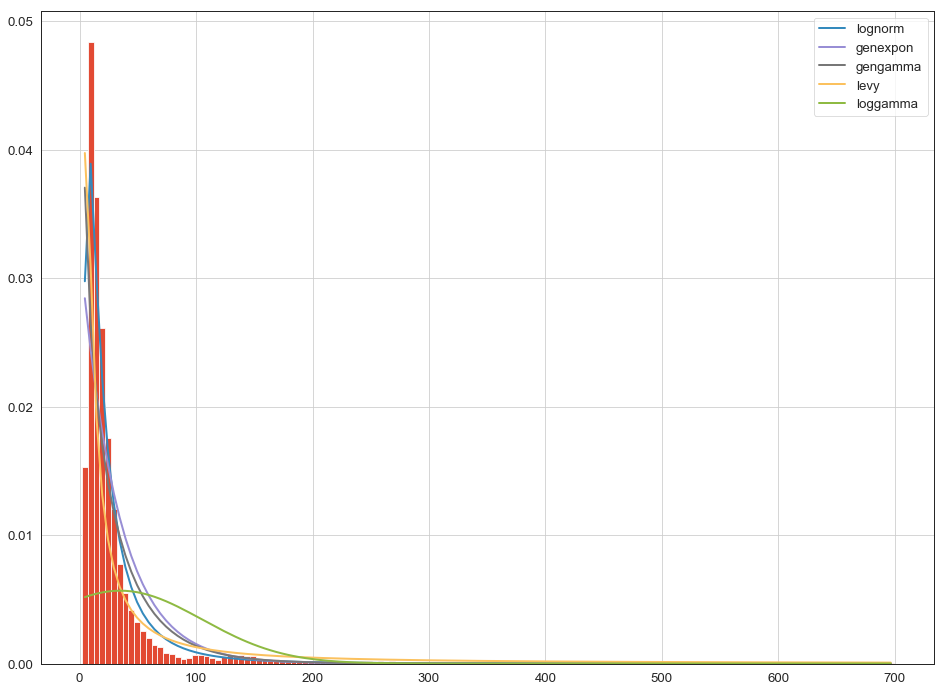

In [27]:
f = Fitter(rides,
           distributions= ['genexpon','gengamma','levy','loggamma','lognorm'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
t,2872.419055,-995464.090336,inf,0.000448
pareto,2750.090679,-936115.396707,inf,0.001359
pearson3,3290.614633,-930529.958462,inf,0.001508
logistic,5700.262973,-908347.553893,inf,0.002283
powerlaw,2007.838800,-892591.345169,inf,0.003063


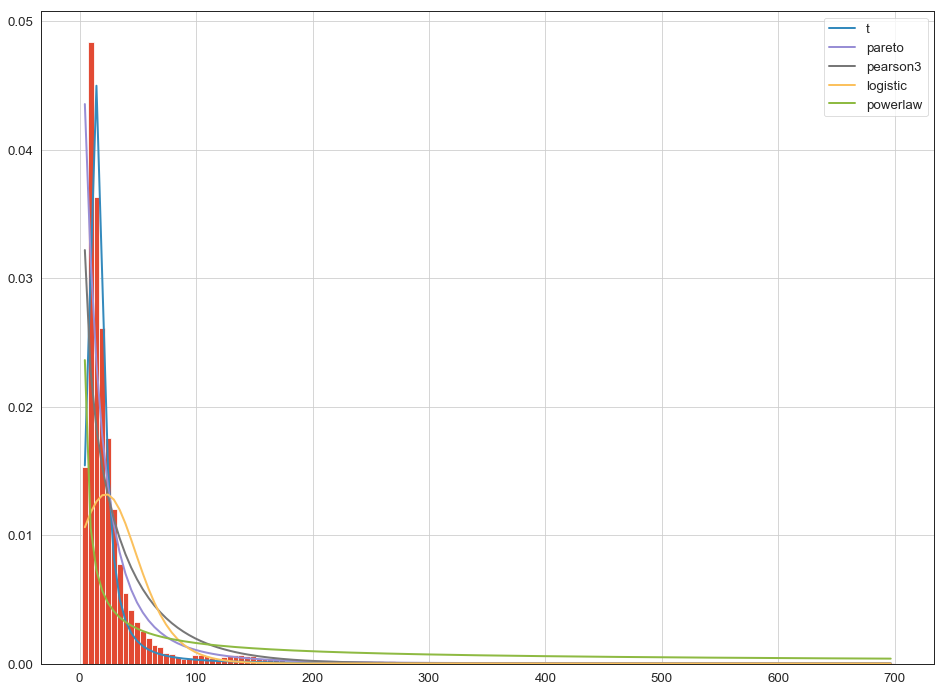

In [28]:
f = Fitter(rides,
           distributions= ['logistic','pareto','pearson3','powerlaw','t'], bins = 140)
f.fit()
f.summary()

### 5 best distributions chosen from the above analysis

,aic,bic,kl_div,sumsquare_error
burr,2703.559368,-1.153841e+06,inf,0.000023
alpha,2621.311579,-1.132406e+06,inf,0.000035
f,2692.889702,-1.127247e+06,inf,0.000038
t,2872.419055,-9.954641e+05,inf,0.000448
expon,3974.018199,-9.435154e+05,inf,0.001183


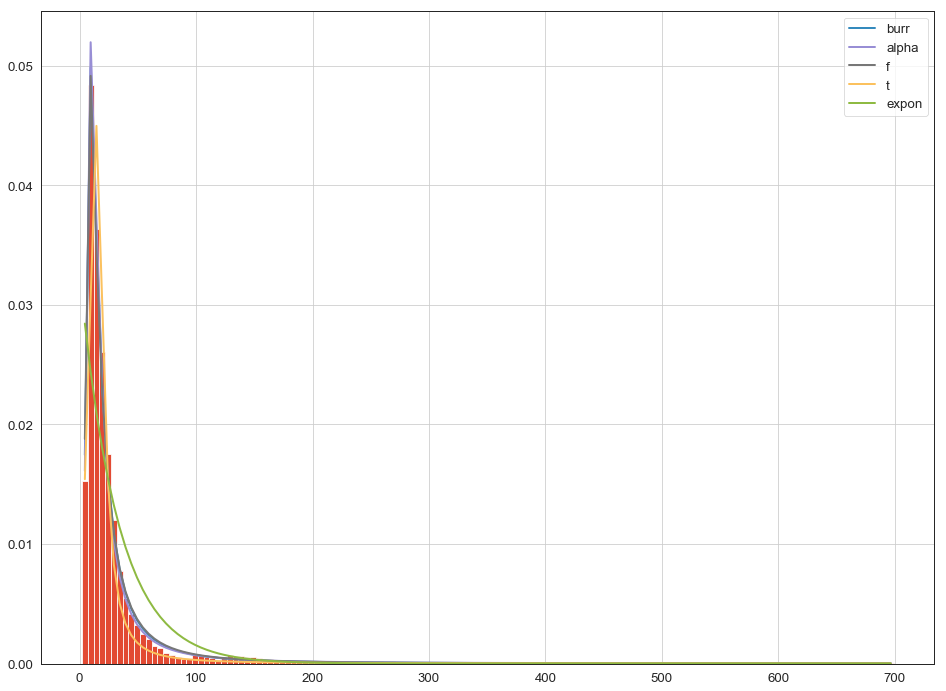

In [32]:
f = Fitter(rides,
           distributions= ['alpha','burr','f', 'expon', 't'], bins = 140)
f.fit()
f.summary()